# Introduction

- In this notebook, we will be introduced to some important concepts of Hypothesis testing.

- There are 3 parts of this notebook:

  1. Hypothesis Testing - One-Sample Test
  2. Hypothesis Testing - Two-Sample Test
  2. Power Analysis

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Part 01: Hypothesis Testing - One-Sample Test

## Example 1

- A school teacher has introduced a new style of reading practice.

- Now he wants to know if his new style is helpful to the students to obtain a better score.

- It is not possible to check if all the students in the world do well with the new reading style.

- So, he decided to take a sample of 60 students. The mean score went up to 6.5. The population standard deviation is 11.

- Assume that we want to determine if the new reading technique helped the students improve their scores with a 95% confidence level.

### Step 1: State the hypothesis

- We can state that the null hypothesis as: there is no change in scores after using these new reading techniques.

  - $H_0 : \mu = 0$

- Here, the teacher wants to test if the new technique he introduced helped improve the score of the students.

- So, the alternative hypothesis is, the mean score is greater than 0.

  - $H_1 : \mu > 0$

- The confidence level was 95%, so the significance level(alpha) is 5% or 0.05.

- We will reject the null hypothesis if the alpha value is smaller than the p-value.

- Otherwise, we will fail to reject the null hypothesis.

### Step 2: Select the appropriate test statistic

- The sample size is 60 and we know the population standard deviation.

- When the sample size is greater than 60 and the population standard deviation is known, a z-statistic is appropriate.

- A test-statistic relating to the mean provides a measure of how far the $\bar{x}$ (sample mean) is from the $\mu$ (population means) under the null hypothesis.

  - $z = \frac{\bar{x} - \mu}{σ / \sqrt{n}}$


- z follows a normal distribution with a mean of 0 and a standard deviation of 1.

### Step 3: Calculate the z-statistic

  - $z = \frac{6.5 - 0}{11 / \sqrt{60}}$

- z-statistics = 4.58


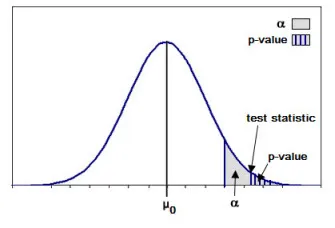


- This p-value is the probability of observing the test statistic that we observed or one that is more extreme, assuming that the null hypothesis is true.

In [ ]:
# Import norm from scipy
from scipy.stats import norm

In [ ]:
# Calculate p-value

# p_value = 1 - norm.cdf(4.58)

p_value = norm.sf(abs(4.58))

p_value

2.324879649934408e-06

### Step 4: Draw the conclusion

- As we can see, the p-value is 2.325e-06 which is very small and a lot smaller than the alpha value (0.05).

- So, we can say that we have enough evidence to reject the null hypothesis.

- That means the new reading technique helped students improve their scores.

## Example 2

- A Scientist wanted to test if the great white sharks are on average 20 feet in length.

- He measured 10 great white sharks. The sample mean is calculated to be 22.27 and the sample standard deviation is 3.19.

- Did he find the evidence that great white sharks are longer than 20 feet in length at the α = 0.05 level of significance?



### Step 1: Setting up the hypothesis and alpha level.

- The null hypothesis is the average length of the white sharks is 20 feet in length.

  - $H_0 : \mu = 20$

- The alternative hypothesis is the mean length of great white sharks is greater than 20 feet.

  - $H_1 : \mu > 20$

- α = 0.05


- State the decision rule.

- If the p-value is less than or equal to α (significance level) reject the null hypothesis. Otherwise do not reject the null hypothesis.

### Step 2: Select the appropriate test statistic

- The sample size is only 10 and we have the sample standard deviation.

- We do not know the population standard deviation.

- If the sample size is less than 30 and the population standard deviation is unknown, the appropriate test-statistic is a t-statistic.

  - $t = \frac{\bar{x} - \mu}{s / \sqrt{n}}$

  - s = sample standard deviation.

### Step 3: Calculate the test-statistic.

In [ ]:
# Measurement data
x = [21.8, 22.7, 17.3, 26.1, 26.4, 21.1, 19.8, 24.1, 18.3, 25.1]
x

[21.8, 22.7, 17.3, 26.1, 26.4, 21.1, 19.8, 24.1, 18.3, 25.1]

In [ ]:
# Import library
from scipy.stats import ttest_1samp

In [ ]:
# Calculate the test-statistic
ttest_1samp(x, popmean = 20, alternative = 'greater')

TtestResult(statistic=2.252289064318635, pvalue=0.025406431103129352, df=9)

- Here the t-statistic is 2.2523 and the p-value is 0.02541.

- The degree of freedom is n-1. Here n is 10(sample size). So the degree of freedom is 9.

### Step 4: Draw the conclusion

- In this example, the p-value is 0.025 which is less than the significance level alpha(0.05).

- So we have enough evidence to reject the null hypothesis.

- That means the mean length of great white sharks is greater than 20.

# Part 02: Hypothesis Testing - Two-Sample Test

## Example 3

- Using the information in the [heart disease dataset](https://raw.githubusercontent.com/binggas/public-dataset/main/Heart.csv), find out if the Cholesterol level of the male population is less than the cholesterol level of the female population in the significance level of 0.05.

### Step 1: Set up the hypothesis and alpha level

- Let’s start with the assumption that the mean cholesterol level in the male and female population is the same.

  - $H_0 : \mu_1 = \mu_2$

- $\mu_1$ is the mean cholesterol of the male population and $\mu_2$ is the mean cholesterol of the female population.


- The alternative hypothesis can be set as the mean cholesterol of the male population is less than the mean cholesterol of the female population.

  - $H_1 : \mu_1 < \mu_2$


- α = 0.05

- If the p-value is less than the alpha we will reject the null hypothesis and otherwise, we will not reject the null hypothesis.

### Step 2: Select the appropriate test statistic

- We are going to use a t-statistic to compare two means in statistics.

### Step 3: Calculate the t-statistic and the p-value

- Can you argue why we are using t-test?

In [ ]:
# Import data

df = pd.read_csv("https://raw.githubusercontent.com/binggas/public-dataset/main/Heart.csv")
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
# Get cholestrol level for male and female

male_chol = df[df["Sex"]==1]["Chol"]
female_chol = df[df["Sex"]==0]["Chol"]

In [ ]:
# Import library
from scipy.stats import ttest_ind

In [ ]:
# Calculate the test-statistic
ttest_ind(male_chol, female_chol, alternative = "less")

Ttest_indResult(statistic=-3.539847931068439, pvalue=0.00023183063239068423)

- The t-statistic is -3.5398 and the p-value is 0.000232.

### Step 4: Draw the conclusion

- As the p-value came out to be smaller than the alpha level, we have enough evidence to reject the null hypothesis.

- So, the cholesterol level in the male population is less than the cholesterol level in the female population.

## Example 4

- The local healthcare provider claimed that 50% of the population of age 29 to 77 is suffering from some type of heart disease.

- According to this Heart dataset, approximately 46% of the population of age 29 to 77 have heart disease.

- We decided to calculate the 90% confidence interval for the proportion of the population of the specified age group suffering from heart disease.

- Also, test if the population proportion suffering from heart disease in this specified age group is 50%.

  - α = 0.1

  - $H_0 : p = 0.5$

  - $H_1 : p \not= 0.5$



- If the p-value is less than the alpha we will reject the null hypothesis and otherwise, we will not reject the null hypothesis.


- Do you know how this test is different than the other examples above?

In [ ]:
# Get the number of the population in the data
df.shape[0]

303

In [ ]:
# Get the data where AHD = Yes
df[df["AHD"] == "Yes"].shape[0]

139

In [ ]:
# Import library for proportion z-test
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# Calculate the test-statistic
proportions_ztest(count = 139, nobs = 303, value=0.5, alternative='two-sided')

(-1.4411261644503872, 0.14954904297311244)

- The p-value is 0.149 which is bigger than the alpha value.

- We do not have enough evidence to reject the null hypothesis.

- That means the population proportion that suffers from heart disease within the age bracket of 29 to 77 is 50% with a significance level of 0.1.

## Example 5

- In the same dataset, let’s check if the population proportion of males and females with heart disease is the same with the age range of 29 to 77.

- Assume the significance level (α) is 0.1.


- The null hypothesis is the population proportion of males and females with heart disease is the same.

  - $H_0 : p_1 = p_2$

- The alternative hypothesis should be the population proportion of males and females with heart disease within the specified age range is not the same:

  - $H_1 : p_1 \not= p_2$


- We can use the exact same function as before here. The only change is, we need to pass the number of males with heart disease and the number of females with heart disease both as the first parameter. And in the second parameter, we need to use the total number of males and the total number of females.


- If the p-value is less than the alpha we will reject the null hypothesis and otherwise, we will not reject the null hypothesis.

In [ ]:
pd.crosstab(df["Sex"], df["AHD"])

AHD,No,Yes
Sex,,
0,72,25
1,92,114


In [ ]:
# Calculate the test-statistic
proportions_ztest([114, 25], nobs = [206, 97], value=0.5, alternative='two-sided')

(-3.330058728257939, 0.0008682766849642351)

- The p-value (`0.000868`) is less than the alpha value of 0.1. So we have enough evidence to reject the null hypothesis.

- That means the population proportion of males and females with heart disease is not the same.

# Part 03: Power Analysis

- t-Test Power Analysis
- H0 : the sample populations have the same mean
  - $H_0 : μ_1 = μ_2$

- H1 : the sample populations have different mean
  - $H_0 : μ_1 \not= μ_2$


- How many observations are required from each sample in order to at least detect an effect of 0.80?

- With an 80% chance of detecting the effect if it is true (20% of a Type II error) and a 5% chance of detecting an effect if there is no such effect (Type I error).

- We set the parameters to be:
  - Significance level (α): 5%
  - Effect Size: Cohen’s d of at least 0.80
  - Statistical Power: 80% or 0.80

- The statsmodels library provides the TTestIndPower class for calculating a power analysis for the Student’s t test with independent samples. Of note is the TTestPower class that can perform the same analysis for the paired Student’s t test.

- The function solve_power() can be used to calculate one of the four parameters in a power analysis.

- In our case, we are interested in calculating the sample size. We can use the function by providing the three pieces of information we know (alpha, effect, and power) and setting the size of argument we wish to calculate the answer of (nobs1) to “None“. This tells the function what to calculate.

- A note on sample size: the function has an argument called ratio that is the ratio of the number of samples in one sample to the other. If both samples are expected to have the same number of observations, then the ratio is 1.0. If, for example, the second sample is expected to have half as many observations, then the ratio would be 0.5.

In [ ]:
# Import library
from statsmodels.stats.power import TTestIndPower

In [ ]:
# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


- We can assume a significance of 0.05 (the default for the function) and explore the change in sample size between 5 and 100 with low, medium, and high effect sizes.

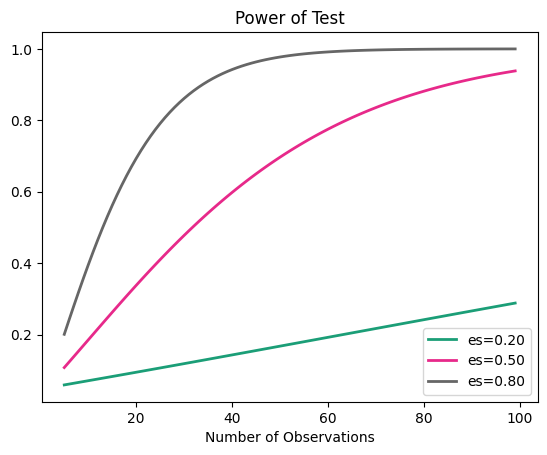

In [ ]:
# parameters for power analysis
effect_sizes = np.array([0.2, 0.5, 0.8]) #low (0.2), medium (0.5), high (0.8) effect sizes

sample_sizes = np.array(range(5, 100))

# calculate power curves from multiple power analyses
analysis = TTestIndPower()

# plot

fig, ax = plt.subplots()

analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, ax=ax)


# ax.axhline(0.8, linestyle="--", c="blue")
# ax.axvline(50, linestyle="--", c="red")

plt.show()

- Running the example creates the plot showing the impact on statistical power (y-axis) for three different effect sizes (es) as the sample size (x-axis) is increased.

- We can see that if we are interested in a large effect that a point of diminishing returns in terms of statistical power occurs at around 40-to-50 observations.

# End of Notebook